In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
paysim = pd.read_csv('../data/paysimdata.csv')
paysim

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [19]:
#Check features information type
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


* step - integer - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - string/categorical - type of transaction: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - float - amount of the transaction in local currency.

* nameOrig - string - customer who initiated the transaction

* oldbalanceOrg - float initial balance before the transaction

* newbalanceOrig - float - new balance after the transaction

* nameDest - string - customer who is the recipient of the transaction

* oldbalanceDest - float - initial balance of recipient before the transaction.

* newbalanceDest - float - new balance of recipient after the transaction.

* isFraud - boolean/binary - tells if transaction is fraudulent (encoded as 1) or valid (encoded as 0)

* isFlaggedFraud - boolean/binary - tells if transaction is flagged as fraudulent (encoded as 1) or not flagged at all (encoded as 0). An observation is flagged if the transaction is fraudulent and it involved a transfer of over 200,000 in the local currency.

In [20]:
#Check dataframe shape
paysim.shape

(6362620, 11)

In [21]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [22]:
#Check if there are any missing values
paysim.isnull().values.sum()

0

* There are no missing values
* There are just over 6 million observations
* There are 11 features
* Most transactions involve amounts less than 1 million euros.
* Most observations in the dataset are of valid transactions, so any patterns related to identifying fraud transactions may be hard to see, data is also unbalanced.
* From the sample of observations, there are many instances where what happens to the recipient account (oldbalanceDest, newbalanceDest) does not make sense (e.g. the very first observation involved a payment of 9839.64 yet, the balance before and after the transaction equals 0.)

### Visualitations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014288227790>,
      dtype=object)

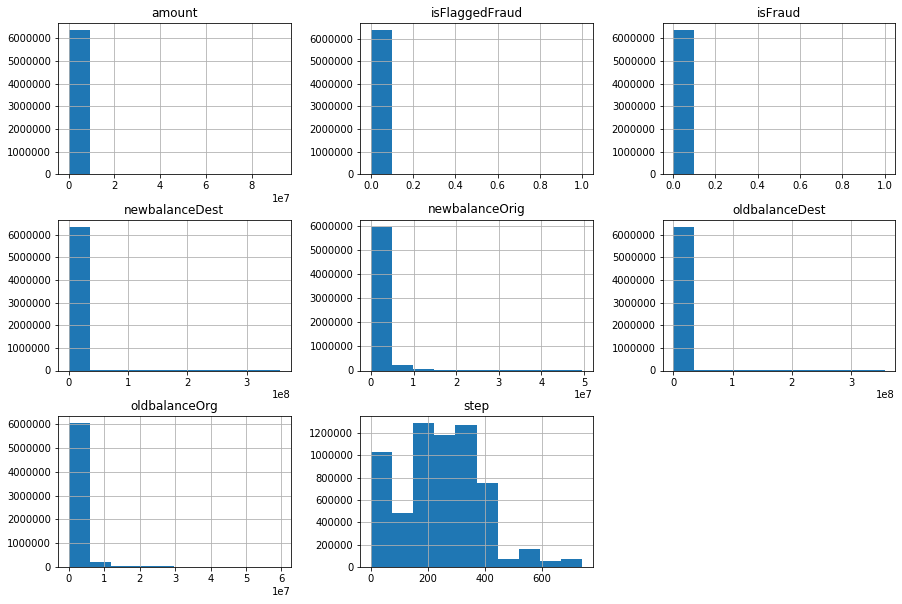

In [23]:
paysim.hist(figsize=(15,10))

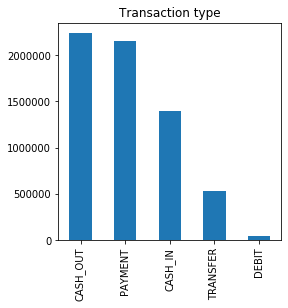

In [24]:
#Visualice the different types of transactions
f, ax = plt.subplots(1, 1, figsize=(8, 8))
paysim.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(4,4))
plt.show()

In [9]:
#Visualice the different types of transactions
f, ax = plt.subplots(1, 1, figsize=(8, 8))
paysim.amount.value_counts().plot(kind='bar', title="Amount", ax=ax, figsize=(10,10))
plt.show()

### When does fraud happens?
From de nameOrig and nameDest columns, the input that starts with 'C' is the Customer and if starts with 'M' is the Business

In [26]:
# Adding feature validTransactionType to the new df
paysim_new = paysim.copy()
paysim_new["validTransactionType"] = np.nan # Initializing new feature column

# filling feature column
paysim_new.loc[paysim.nameOrig.str.contains('C') & paysim.nameDest.str.contains('C'),"validTransactionType"] = "CC" 
paysim_new.loc[paysim.nameOrig.str.contains('C') & paysim.nameDest.str.contains('M'),"validTransactionType"] = "CB"
paysim_new.loc[paysim.nameOrig.str.contains('M') & paysim.nameDest.str.contains('C'),"validTransactionType"] = "BC"
paysim_new.loc[paysim.nameOrig.str.contains('M') & paysim.nameDest.str.contains('M'),"validTransactionType"] = "BB"

In [27]:
#Subsetting data into observations with fraud and valid transactions:
fraud = paysim_new[paysim_new["isFraud"] == 1]
valid = paysim_new[paysim_new["isFraud"] == 0]

In [28]:
#Seeing the counts of transactions by transaction type (CC,CB,BC,BB)
print("Fraud transactions by transaction type: \n",fraud.validTransactionType.value_counts())
print("\n Valid transactions by transaction type: \n",valid.validTransactionType.value_counts())

Fraud transactions by transaction type: 
 CC    8213
Name: validTransactionType, dtype: int64

 Valid transactions by trnasaction type: 
 CC    4202912
CB    2151495
Name: validTransactionType, dtype: int64
